# Global Power Plant Prediction

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')

# Prediction - 1) Primary fuel

In [3]:
gpl = pd.read_csv(r'Global_power_plant.csv')
pd.set_option('display.max_columns',None)
gpl.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
gpl.shape

(907, 27)

So here we have Global Power Plant dataset with 908 nos of Rows and 27 nos of columns

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


<Axes: >

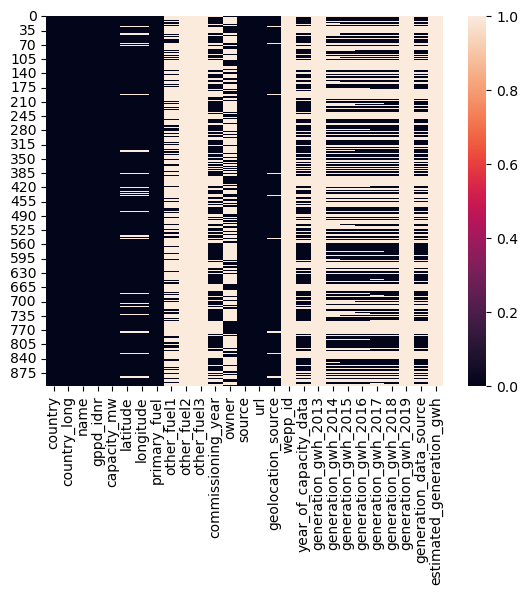

In [5]:
print(gpl.isnull().sum())
sns.heatmap(gpl.isnull())

so we have null values in almost all the columns 

we have to drop some of these columns because these columns have total null values present on the columns and will not be contributing any importance in the prediction

In [6]:
Null_Value_columns = ['other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','wepp_id','year_of_capacity_data',
                      'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                      'generation_gwh_2017','generation_gwh_2018','generation_data_source','estimated_generation_gwh',
                      'generation_gwh_2019']

In [7]:
Null_Value_columns

['other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_data_source',
 'estimated_generation_gwh',
 'generation_gwh_2019']

In [8]:
gpl.drop(Null_Value_columns,axis = 1,inplace= True)

In [9]:
gpl.shape

(907, 11)

As we can check we have dropped 16 columns from the dataset which are not cruisal for prediction because these 16 columns have more than 50% of Rows with null data 

Now filling Null values in remaining columns with mean and mode method

In [10]:
gpl['latitude'].fillna(gpl['latitude'].mean(),inplace=True)
gpl['longitude'].fillna(gpl['longitude'].mean(),inplace=True)
gpl['geolocation_source'].fillna(gpl['geolocation_source'].mode()[0],inplace=True)

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64


<Axes: >

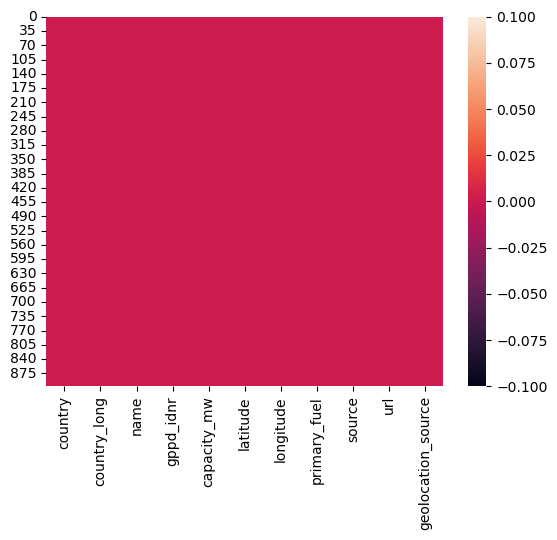

In [11]:
print(gpl.isnull().sum())
sns.heatmap(gpl.isnull())

NOw we have no null values and also shape of dataset has changed, earlier we had 27 nos of columns and now after dropping unwanted columns we have 11 nos of columns

In [12]:
for i in gpl:
    print(gpl[i].value_counts())
    print('\n')
    print('No of unique values in the column :',gpl[i].nunique())
    print('\n')

IND    907
Name: country, dtype: int64


No of unique values in the column : 1


India    907
Name: country_long, dtype: int64


No of unique values in the column : 1


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


No of unique values in the column : 907


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


No of unique values in the column : 907


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Lengt

here we can see that value count in each column which are repeated values and no of unique values present in each columns

in country and country_long we have only 1 unique value so we are converting country column as index and dropping country_log

and in name and gppd_idnr columns values are totally unique they do not provide any meaningful information so we are dropping these columns too

In [13]:
gpl.set_index('country',inplace=True)

In [14]:
gpl.shape

(907, 10)

country column has converted to the index

In [15]:
col_drop = ['country_long','name','gppd_idnr'] 
gpl.drop(columns = col_drop,inplace=True)

In [16]:
gpl.shape

(907, 7)

So we have dropped country_long, name and gppd_idnr columns 

In [17]:
gpl.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
source                 object
url                    object
geolocation_source     object
dtype: object

Here we can check datatype of each columns in the dataset

we have object and float datatypes in the dataset

In [18]:
gpl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, IND to IND
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            907 non-null    float64
 2   longitude           907 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   source              907 non-null    object 
 5   url                 907 non-null    object 
 6   geolocation_source  907 non-null    object 
dtypes: float64(3), object(4)
memory usage: 56.7+ KB


Here we can check for null values, datatypes, nos of Rows and Columns and memory usage by dataset which is 78.1+ KB

In [19]:
gpl.describe()

,capacity_mw,latitude,longitude
count,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907
std,590.085456,6.079148,4.812291
min,0.000000,8.168900,68.644700
25%,16.725000,17.072000,74.388900
50%,59.200000,21.281800,76.979200
75%,385.250000,25.176450,79.206100
max,4760.000000,34.649000,95.408000


here we can check for which type of distribution can these columns might have

for capacity mw columns mean is much greater than median so here so there is right skewness present, and difference between 3rd IQR and max values are very high so there are outliers present 

and in remaining 2 columns mean and median are almost the same

#### Univariate Analysis

Text(0.5, 1.0, 'Countplot for primary_fuel')

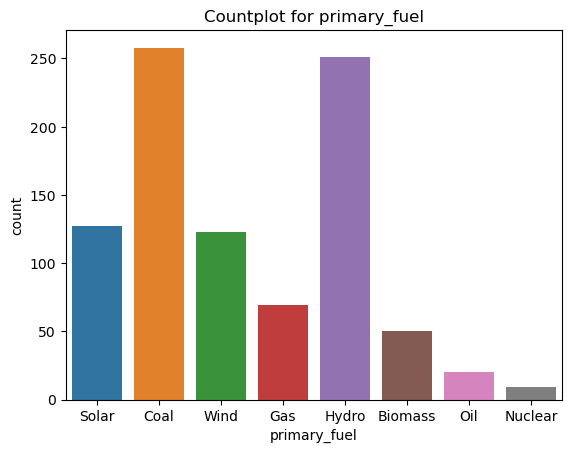

In [20]:
sns.countplot(x=gpl['primary_fuel'])
plt.title('Countplot for primary_fuel')

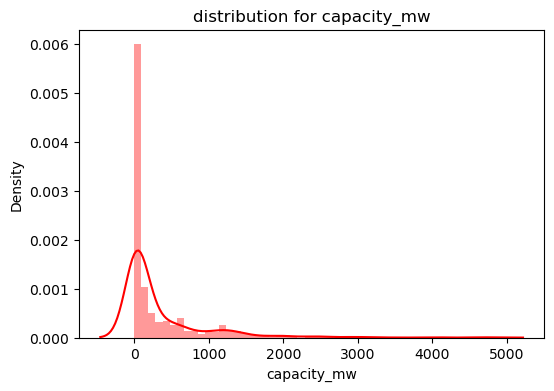

In [21]:
plt.figure(figsize = (6,4))
sns.distplot(gpl['capacity_mw'], color='red')
plt.title('distribution for capacity_mw')
plt.show()

Text(0.5, 1.0, 'Countplot for geolocation_source')

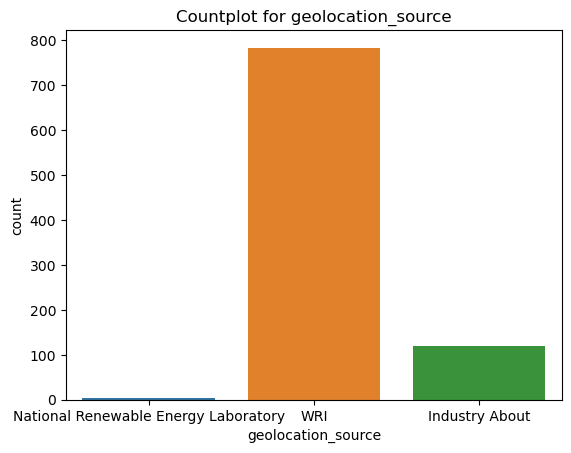

In [22]:
sns.countplot(x=gpl['geolocation_source'])
plt.title('Countplot for geolocation_source')

#### Bivariate Analysis

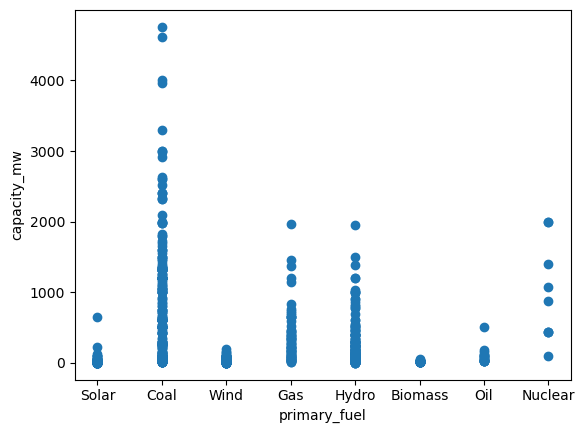

In [23]:
plt.scatter(gpl['primary_fuel'], gpl['capacity_mw'])
plt.xlabel('primary_fuel')
plt.ylabel('capacity_mw')
plt.show()

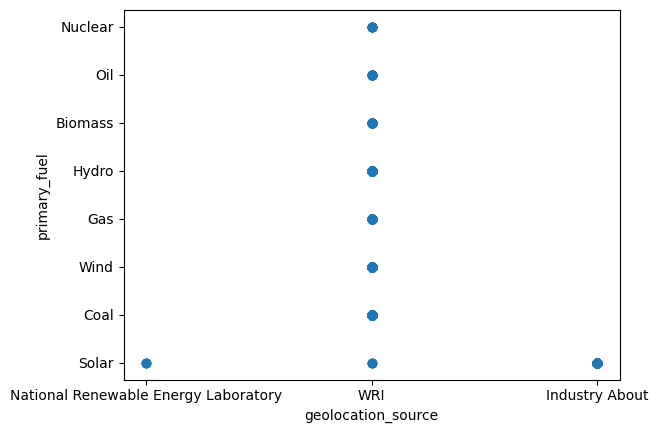

In [24]:
plt.scatter(gpl['geolocation_source'], gpl['primary_fuel'])
plt.xlabel('geolocation_source')
plt.ylabel('primary_fuel')
plt.show()

In [25]:
num_col = gpl.select_dtypes(['float']).columns
num_col

Index(['capacity_mw', 'latitude', 'longitude'], dtype='object')

In [26]:
cat_col = gpl.select_dtypes(['object']).columns
cat_col

Index(['primary_fuel', 'source', 'url', 'geolocation_source'], dtype='object')

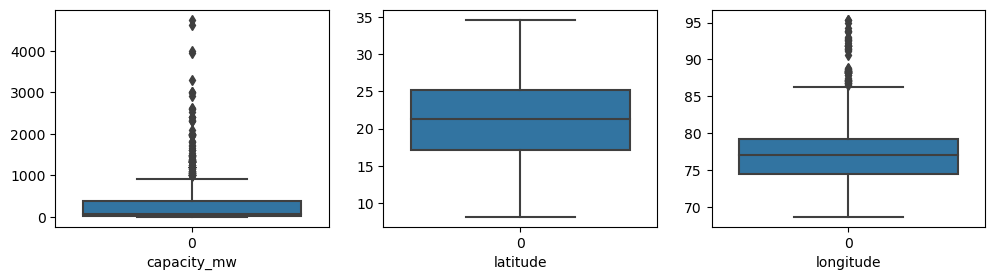

In [26]:
plt.figure(figsize=(12,40))
plot = 1
for col in num_col:
    if plot<=32:
        plt.subplot(12,3,plot)
        sns.boxplot(gpl[col])
        plt.xlabel(col)
    plot+=1
plt.show()

In [27]:
from scipy.stats import zscore

In [28]:
df1 = gpl[['capacity_mw','longitude']]
z=np.abs(zscore(df1))
z

,capacity_mw,longitude
country,,
IND,0.548908,0.878280
IND,0.386977,0.593788
IND,0.486679,1.682394
IND,0.324240,2.889052
IND,2.498942,1.027976
...,...,...
IND,2.159821,0.022477
IND,0.548060,0.145644
IND,0.509909,0.391673


In [29]:
np.where(z>3)

(array([ 15, 143, 147, 179, 183, 209, 244, 308, 323, 333, 340, 360, 363,
        364, 375, 416, 427, 482, 493, 494, 499, 519, 546, 577, 638, 648,
        657, 695, 726, 767, 786, 788, 808, 818, 847, 880], dtype=int64),
 array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64))

In [30]:
df1 = gpl[(z<3).all(axis=1)]
df1.shape

(871, 7)

In [31]:
print('Loss of Data in percentage',((gpl.shape[0]-df1.shape[0])/gpl.shape[0])*100)

Loss of Data in percentage 3.9691289966923926


In [32]:
gpl.skew()

capacity_mw    3.123576
latitude      -0.149698
longitude      1.141881
dtype: float64

In [33]:
gpl['capacity_mw'] = np.cbrt(gpl['capacity_mw'])
gpl['longitude'] = np.cbrt(gpl['longitude'])

In [34]:
gpl.skew()

capacity_mw    1.013378
latitude      -0.149698
longitude      1.002134
dtype: float64

Encoding Categorical columns

In [35]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
le

LabelEncoder()

In [37]:
gpl['primary_fuel'] = le.fit_transform(gpl['primary_fuel'])
gpl['source'] = le.fit_transform(gpl['source'])
gpl['url'] = le.fit_transform(gpl['url'])
gpl['geolocation_source'] = le.fit_transform(gpl['geolocation_source'])

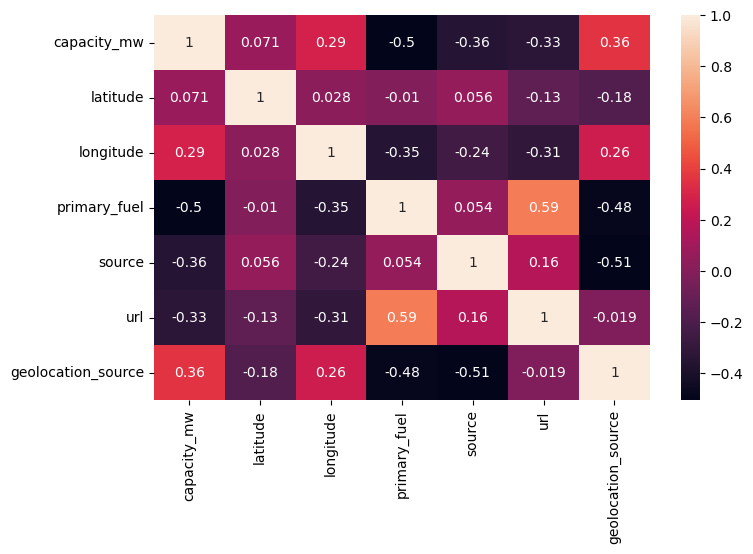

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(gpl.corr(),annot= True)
plt.show()

splitting the data

In [39]:
x = gpl.drop('primary_fuel',axis=1)
y = gpl['primary_fuel']

In [40]:
x.shape

(907, 6)

In [41]:
y.shape

(907,)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,capacity_mw,latitude,longitude,source,url,geolocation_source
0,-1.126096,1.149805,-0.892687,1.460215,0.476673,-1.083349
1,-0.132660,0.587311,-0.593158,2.917019,1.116401,0.394241
2,-0.503206,0.116179,-1.760007,-0.512075,1.571318,0.394241
3,0.025977,0.439989,2.808168,-0.489662,-0.518459,0.394241
4,2.174090,0.125479,1.047925,-0.489662,-0.518459,0.394241
...,...,...,...,...,...,...
902,2.031075,-0.806975,-0.002532,-0.489662,-0.518459,0.394241
903,-1.100127,-1.366853,0.168603,0.743019,-1.030242,-2.560940
904,-0.641727,-0.974707,-0.382577,-0.512075,2.353208,0.394241
905,-0.224749,0.518793,-0.781270,0.339596,-0.177271,0.394241


In [44]:
y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [47]:
y1.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

# Building model

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size=.30, random_state=0)

In [50]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7532258064516129
[[74  2  0  0  0  1  0  0]
 [ 4 38  7  3 10  4  0  0]
 [ 2 14 41  6  5 11  0  1]
 [10  3  6 34  3 27  0  0]
 [ 0  3 13  1 70  3  0  0]
 [ 1  1  5  2  0 66  0  3]
 [ 0  2  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 73]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        77
           1       0.60      0.58      0.59        66
           2       0.57      0.51      0.54        80
           3       0.74      0.41      0.53        83
           4       0.80      0.78      0.79        90
           5       0.59      0.85      0.69        78
           6       1.00      0.97      0.99        73
           7       0.95      1.00      0.97        73

    accuracy                           0.75       620
   macro avg       0.76      0.76      0.75       620
weighted avg       0.76      0.75      0.74       620



In [51]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9064516129032258
[[75  2  0  0  0  0  0  0]
 [ 2 51  6  2  3  2  0  0]
 [ 1  6 67  1  3  2  0  0]
 [ 0  3  6 66  3  5  0  0]
 [ 0  6  2  2 80  0  0  0]
 [ 0  0  1  0  0 77  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 73]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.75      0.77      0.76        66
           2       0.82      0.84      0.83        80
           3       0.93      0.80      0.86        83
           4       0.90      0.89      0.89        90
           5       0.90      0.99      0.94        78
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        73

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620



In [52]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8435483870967742
[[75  1  0  1  0  0  0  0]
 [ 5 41  8  2  8  2  0  0]
 [ 2  5 57  1  8  5  1  1]
 [ 3 11  5 51  3 10  0  0]
 [ 0  5  3  2 80  0  0  0]
 [ 1  0  3  1  0 73  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 73]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        77
           1       0.65      0.62      0.64        66
           2       0.75      0.71      0.73        80
           3       0.88      0.61      0.72        83
           4       0.81      0.89      0.85        90
           5       0.81      0.94      0.87        78
           6       0.99      1.00      0.99        73
           7       0.99      1.00      0.99        73

    accuracy                           0.84       620
   macro avg       0.84      0.84      0.84       620
weighted avg       0.84      0.84      0.84       620



In [53]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.5548387096774193
[[71  1  0  0  0  5  0  0]
 [ 0  6  0 48  0 12  0  0]
 [ 2  1  1 68  0  8  0  0]
 [ 0  0  0 83  0  0  0  0]
 [ 0  0  0 78 12  0  0  0]
 [14  0  0 36  1 27  0  0]
 [ 0  0  0  0  0  2 71  0]
 [ 0  0  0  0  0  0  0 73]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        77
           1       0.75      0.09      0.16        66
           2       1.00      0.01      0.02        80
           3       0.27      1.00      0.42        83
           4       0.92      0.13      0.23        90
           5       0.50      0.35      0.41        78
           6       1.00      0.97      0.99        73
           7       1.00      1.00      1.00        73

    accuracy                           0.55       620
   macro avg       0.78      0.56      0.51       620
weighted avg       0.78      0.55      0.50       620



In [54]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc = dtc.predict(x_test)
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))

0.8419354838709677
[[70  7  0  0  0  0  0  0]
 [ 1 50  4  6  4  1  0  0]
 [ 1  7 61  3  6  2  0  0]
 [ 0 11  4 56  3  9  0  0]
 [ 0  7  5  3 70  5  0  0]
 [ 0  4  2  2  1 69  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 73]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        77
           1       0.58      0.76      0.66        66
           2       0.80      0.76      0.78        80
           3       0.80      0.67      0.73        83
           4       0.83      0.78      0.80        90
           5       0.80      0.88      0.84        78
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        73

    accuracy                           0.84       620
   macro avg       0.85      0.85      0.84       620
weighted avg       0.85      0.84      0.84       620



Cross Validation Score

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predsvc)-score.mean())

[0.75274725 0.77472527 0.79005525 0.75690608 0.77348066]
0.7695829032845607
difference in accuracy -0.016357096832947837


In [57]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predrfc)-score.mean())

[0.83516484 0.82417582 0.86740331 0.80110497 0.84530387]
0.8346305628073584
difference in accuracy 0.07182105009586748


In [58]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predknn)-score.mean())

[0.74175824 0.79120879 0.81767956 0.7679558  0.80662983]
0.7850464452674397
difference in accuracy 0.058501941829334436


In [59]:
score = cross_val_score(gnb,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predgnb)-score.mean())

[0.65934066 0.64285714 0.65745856 0.62983425 0.62983425]
0.6438649748042014
difference in accuracy -0.08902626512678202


In [60]:
score = cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predtc)-score.mean())

[0.77472527 0.79120879 0.80110497 0.76243094 0.77900552]
0.7816951004796309
difference in accuracy 0.06024038339133686


Hyper parameter Tuning

RandomForestClassifier is not giving least difference in accuracy which is affordable and it is the best performing accuracy

RandomForestClassifier is best model

In [61]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [64]:
predrfc = grid_search.predict(x_test)
acc = accuracy_score(y_test,predrfc)
print(acc*100)

90.48387096774194


In [65]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [74]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=20)

# Saving the Model¶
using joblib

In [67]:
import joblib

In [68]:
joblib.dump(grid_search,'power_plant_prediction.pkl')

['power_plant_prediction.pkl']

In [69]:
model = joblib.load('power_plant_prediction.pkl')
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [70]:
pred_x = model.predict(x_test)
pred_x

array([3, 5, 6, 3, 0, 7, 2, 6, 0, 2, 4, 3, 6, 5, 7, 7, 3, 6, 7, 7, 2, 2,
       0, 0, 4, 7, 6, 4, 6, 4, 5, 0, 6, 3, 6, 4, 7, 3, 4, 1, 5, 0, 6, 0,
       3, 2, 6, 1, 5, 0, 3, 1, 0, 2, 5, 2, 1, 5, 6, 6, 6, 7, 2, 0, 7, 7,
       0, 6, 4, 4, 3, 7, 7, 5, 2, 6, 2, 2, 4, 5, 2, 1, 2, 5, 1, 1, 4, 2,
       4, 2, 5, 3, 5, 7, 6, 4, 3, 2, 6, 0, 7, 5, 6, 1, 7, 5, 7, 0, 5, 3,
       5, 1, 6, 5, 7, 5, 6, 5, 6, 2, 6, 3, 2, 3, 6, 5, 5, 6, 5, 0, 6, 4,
       1, 7, 4, 4, 1, 2, 2, 3, 1, 0, 0, 1, 4, 4, 3, 2, 4, 0, 1, 7, 6, 0,
       2, 2, 0, 1, 3, 3, 4, 1, 3, 2, 6, 0, 4, 1, 6, 6, 2, 3, 7, 2, 2, 3,
       1, 5, 5, 1, 0, 6, 1, 4, 5, 3, 5, 4, 3, 6, 4, 4, 2, 5, 0, 7, 3, 7,
       6, 4, 3, 3, 2, 7, 0, 1, 4, 6, 7, 4, 3, 4, 0, 3, 0, 6, 7, 6, 2, 5,
       5, 4, 1, 0, 7, 7, 1, 6, 1, 4, 4, 0, 4, 6, 2, 5, 0, 5, 5, 7, 3, 0,
       7, 0, 4, 4, 5, 2, 0, 0, 1, 7, 0, 2, 3, 5, 3, 3, 5, 1, 2, 4, 0, 4,
       6, 6, 0, 5, 5, 4, 0, 0, 3, 1, 1, 7, 0, 2, 4, 3, 1, 0, 4, 0, 0, 5,
       7, 0, 6, 6, 7, 5, 1, 2, 1, 7, 0, 7, 0, 0, 7,

In [71]:
data = pd.DataFrame({'model predicted':pred_x,'original':y_test})
data

,model predicted,original
811,3,1
1685,5,5
200,6,6
725,3,3
1081,0,0
...,...,...
1771,5,5
1288,2,2
1126,1,2
1854,6,6


# Prediction - 1) capacity_mw

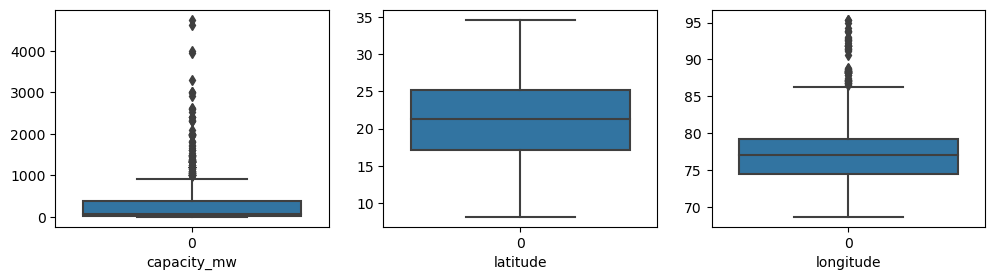

In [27]:
plt.figure(figsize=(12,40))
plot = 1
for col in num_col:
    if plot<=32:
        plt.subplot(12,3,plot)
        sns.boxplot(gpl[col])
        plt.xlabel(col)
    plot+=1
plt.show()

In [29]:
from scipy.stats import zscore

In [36]:
df2 = gpl[['longitude']]
z=np.abs(zscore(df2))
z

,longitude
country,
IND,0.878280
IND,0.593788
IND,1.682394
IND,2.889052
IND,1.027976
...,...
IND,0.022477
IND,0.145644
IND,0.391673


In [37]:
np.where(z>3)

(array([179, 183, 244, 323, 333, 340, 360, 416, 427, 499, 519, 546, 577,
        638, 818, 847], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [38]:
df2 = gpl[(z<3).all(axis=1)]

In [40]:
df2.shape

(891, 7)

In [41]:
print('Loss of Data in percentage',((gpl.shape[0]-df2.shape[0])/gpl.shape[0])*100)

Loss of Data in percentage 1.7640573318632855


In [42]:
gpl.skew()

capacity_mw    3.123576
latitude      -0.149698
longitude      1.141881
dtype: float64

In [45]:
gpl['longitude'] = np.sqrt(gpl['longitude'])

In [46]:
gpl.skew()

capacity_mw    3.123576
latitude      -0.149698
longitude      0.967550
dtype: float64

Encoding Categorical columns


In [47]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [49]:
gpl['primary_fuel'] = le.fit_transform(gpl['primary_fuel'])
gpl['source'] = le.fit_transform(gpl['source'])
gpl['url'] = le.fit_transform(gpl['url'])
gpl['geolocation_source'] = le.fit_transform(gpl['geolocation_source'])

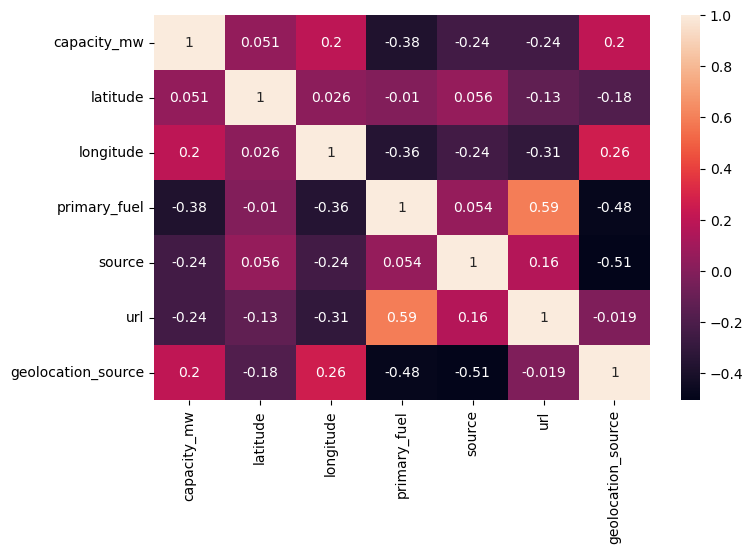

In [50]:
plt.figure(figsize=(8,5))
sns.heatmap(gpl.corr(),annot= True)
plt.show()

splitting data

In [56]:
x = gpl.drop('capacity_mw',axis=1)
y = gpl['capacity_mw']

In [57]:
x.shape

(907, 6)

In [59]:
y.shape

(907,)

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,source,url,geolocation_source
0,1.149805,-0.896071,1.225688,1.460215,0.476673,-1.083349
1,0.587311,-0.592793,-0.967877,2.917019,1.116401,0.394241
2,0.116179,-1.779578,1.664401,-0.512075,1.571318,0.394241
3,0.439989,2.787760,-0.529164,-0.489662,-0.518459,0.394241
4,0.125479,1.052521,-0.967877,-0.489662,-0.518459,0.394241
...,...,...,...,...,...,...
902,-0.806975,0.002503,-0.967877,-0.489662,-0.518459,0.394241
903,-1.366853,0.174325,1.225688,0.743019,-1.030242,-2.560940
904,-0.974707,-0.380135,1.664401,-0.512075,2.353208,0.394241
905,0.518793,-0.783150,-0.967877,0.339596,-0.177271,0.394241


# Building Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=42)


lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(mean_squared_error(y_test,predlr))
print(mean_absolute_error(y_test,predlr))
print(r2_score(y_test,predlr))

333594.72954577394
339.14131428089337
0.20846098031799043


In [67]:
la = Lasso()
la.fit(x_train,y_train)
predla = la.predict(x_test)
print(mean_squared_error(y_test,predla))
print(mean_absolute_error(y_test,predla))
print(r2_score(y_test,predla))

334073.33692579
338.7012765362622
0.20732536160810766


In [68]:
rg = Ridge()
rg.fit(x_train,y_train)
predrg = rg.predict(x_test)
print(mean_squared_error(y_test,predrg))
print(mean_absolute_error(y_test,predrg))
print(r2_score(y_test,predrg))

333749.1189228255
338.96877646704877
0.20809465194005983


In [69]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [70]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr = rfr.predict(x_test)
print(mean_squared_error(y_test,predrfr))
print(mean_absolute_error(y_test,predrfr))
print(r2_score(y_test,predrfr))

244806.11337572505
240.84123702798527
0.4191347349599065


In [71]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
predetr = etr.predict(x_test)
print(mean_squared_error(y_test,predetr))
print(mean_absolute_error(y_test,predetr))
print(r2_score(y_test,predetr))

295793.2651423705
254.42809654456656
0.2981546457939275


In [72]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtr = dtr.predict(x_test)
print(mean_squared_error(y_test,predtr))
print(mean_absolute_error(y_test,predtr))
print(r2_score(y_test,predtr))

482177.7838967843
314.99992307692304
-0.1440904084359491


In [73]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
predknr = knr.predict(x_test)
print(mean_squared_error(y_test,predknr))
print(mean_absolute_error(y_test,predknr))
print(r2_score(y_test,predknr))

225671.06003301745
252.35907545787546
0.46453755467793045


check for Cross validation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
score1 = cross_val_score(lr,x,y)
print(score1)
print(score1.mean())
print('difference in r2_score and cvs',r2_score(y_test,predlr)-score1.mean())

[0.17376765 0.13147361 0.15583722 0.24769624 0.23485274]
0.18872549175385817
difference in r2_score and cvs 0.019735488564132264


In [76]:
score2 = cross_val_score(la,x,y)
print(score2)
print(score2.mean())
print('difference in r2_score and cvs',r2_score(y_test,predla)-score2.mean())

[0.17565477 0.13624303 0.15606569 0.24611795 0.23380375]
0.1895770378628939
difference in r2_score and cvs 0.017748323745213762


In [77]:
score3 = cross_val_score(rg,x,y)
print(score3)
print(score3.mean())
print('difference in r2_score and cvs',r2_score(y_test,predrg)-score3.mean())

[0.17427066 0.13323216 0.15569239 0.24743353 0.23454525]
0.1890347954546359
difference in r2_score and cvs 0.019059856485423937


In [78]:
score4 = cross_val_score(rfr,x,y)
print(score4)
print(score4.mean())
print('difference in r2_score and cvs',r2_score(y_test,predrfr)-score4.mean())

[0.40394167 0.39641898 0.32445803 0.35251481 0.47614247]
0.3906951917265749
difference in r2_score and cvs 0.028439543233331588


In [79]:
score5 = cross_val_score(etr,x,y)
print(score5)
print(score5.mean())
print('difference in r2_score and cvs',r2_score(y_test,predetr)-score5.mean())

[0.34831291 0.45314759 0.22791699 0.30482816 0.48257704]
0.36335653712489113
difference in r2_score and cvs -0.06520189133096366


In [80]:
score6 = cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference in r2_score and cvs',r2_score(y_test,predtr)-score6.mean())

[ 0.00347405 -0.0331906   0.12151189 -0.04138927  0.44992154]
0.10006552242533688
difference in r2_score and cvs -0.244155930861286


In [81]:
score7 = cross_val_score(knr,x,y)
print(score7)
print(score7.mean())
print('difference in r2_score and cvs',r2_score(y_test,predknr)-score7.mean())

[0.20944412 0.20420451 0.08765359 0.55141444 0.43465592]
0.2974745158444452
difference in r2_score and cvs 0.16706303883348528


So here we can see that KNeighborsRegressor is us R2_score 46 which is higher than any other algo 

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2],}

In [86]:
knn = KNeighborsRegressor()

In [87]:
grid = GridSearchCV(estimator=knn, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [89]:
grid.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [90]:
import joblib

In [91]:
joblib.dump(grid,'power_plant_linear.pkl')

['power_plant_linear.pkl']

In [92]:
model_2 = joblib.load('power_plant_linear.pkl')
model_2

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [93]:
pred_x1 = model_2.predict(x_test)
pred_x1

array([ 124.936 ,   17.95  ,  383.64  ,  411.92  ,  135.6   ,    5.28  ,
        219.8   ,   11.44  ,  862.    ,   31.2   ,   56.2   ,   59.2   ,
         23.56  ,   92.28  ,   75.8   ,   23.23  ,   12.59  ,  459.92  ,
        205.    ,  241.5   ,    8.    ,   17.95  ,   15.2   ,  466.804 ,
         22.952 ,   24.35  ,  660.    ,    3.    ,   24.4   ,   21.36  ,
        716.    ,  470.104 ,  683.4542, 1088.6   ,  285.75  ,  116.8   ,
        362.5   , 1008.    ,  484.2   ,   53.8   ,  592.866 ,  335.68  ,
       1186.    ,   88.7   ,   12.59  , 1268.    ,  642.    ,   18.04  ,
        463.8948,   15.8   ,   61.98  ,  205.    ,   37.88  , 1451.    ,
         53.24  ,  142.16  ,  857.    ,   59.2   ,  122.3   ,  307.    ,
         29.292 ,  842.    ,   54.8   ,  732.    ,   26.4   ,   22.6   ,
        470.    ,   14.4   ,   46.06  ,  122.3   ,  135.6   ,   26.42  ,
        135.6   ,   95.6   , 1114.    , 2030.    ,  683.4542,  732.    ,
         83.4   ,  107.7   ,  142.16  ,   12.7   , 

In [95]:
data_2 = pd.DataFrame({'model predicted':pred_x1,'original':y_test})
data_2

,model predicted,original
country,,
IND,124.936,187.2
IND,17.950,50.4
IND,383.640,41.4
IND,411.920,770.0
IND,135.600,4.5
...,...,...
IND,984.000,246.0
IND,14.000,5.8
IND,18.240,20.0
